Number of Finance_Lending and Blockchain clients: 47


C:\Users\AnjaliChaurasiya\AppData\Local\Temp\ipykernel_8876\663200565.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clients["industry"], palette="Accent")


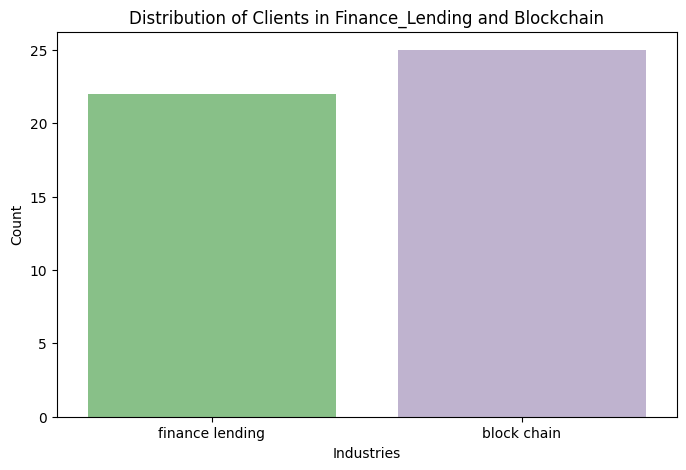

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("industry_client_details.csv")

industries = ["Finance Lending","Block Chain"]

l_industries = [x.lower() for x in industries]
df["industry"] = df["industry"].str.lower()
clients = df[df["industry"].isin(l_industries)]

num_clients = clients["client_id"].nunique()
print(f"Number of Finance_Lending and Blockchain clients: {num_clients}")

plt.figure(figsize=(8, 5))
sns.countplot(x=clients["industry"], palette="Accent")
plt.title("Distribution of Clients in Finance_Lending and Blockchain")
plt.xlabel("Industries")
plt.ylabel("Count")
plt.show()

Industry with the highest renewal rate: Gaming (72.73%)


C:\Users\AnjaliChaurasiya\AppData\Local\Temp\ipykernel_8876\326231709.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_renewal.index, y=industry_renewal["renewal_rate"], palette="CMRmap")


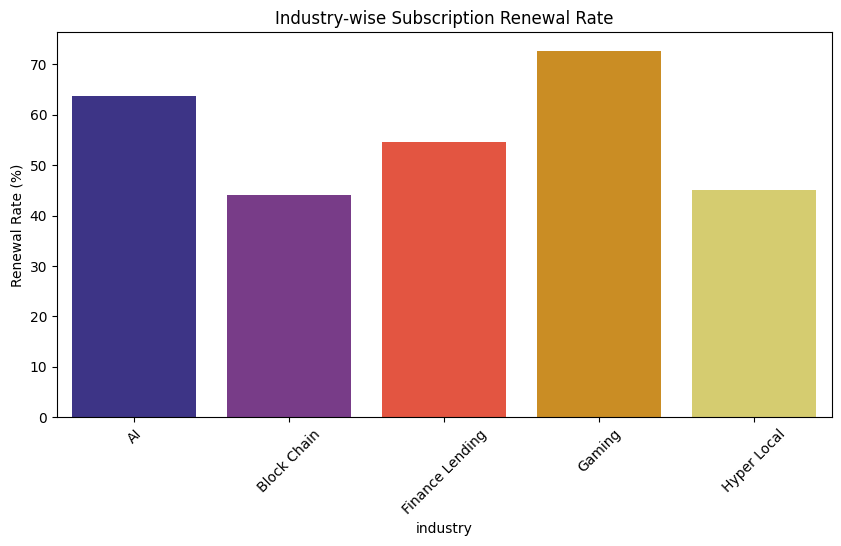

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_clients = pd.read_csv("industry_client_details.csv") 
df_subscriptions = pd.read_csv("subscription_information.csv")

df_merged = pd.merge(df_clients, df_subscriptions, on="client_id", how="inner")

df_merged["renewed"] = df_merged["renewed"].astype(str).str.lower().map({"true": 1, "false": 0})

# Group by industry and calculate renewal rate
industry_renewal = df_merged.groupby("industry")["renewed"].agg(["sum", "count"])

industry_renewal["renewal_rate"] = (industry_renewal["sum"] / industry_renewal["count"]) * 100


# Find the industry with the highest renewal rate
highest_renewal_industry = industry_renewal["renewal_rate"].idxmax()
highest_renewal_rate = industry_renewal["renewal_rate"].max()

print(f"Industry with the highest renewal rate: {highest_renewal_industry} ({highest_renewal_rate:.2f}%)")

plt.figure(figsize=(10, 5))
sns.barplot(x=industry_renewal.index, y=industry_renewal["renewal_rate"], palette="CMRmap")
plt.xticks(rotation=45)
plt.ylabel("Renewal Rate (%)")
plt.title("Industry-wise Subscription Renewal Rate")
plt.show()


Average Inflation Rate When Subscriptions Were Renewed: 3.84%


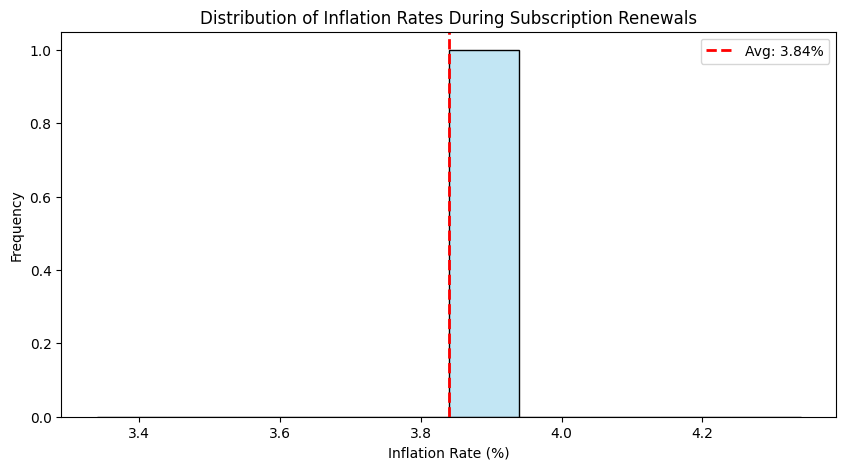

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load datasets
df_inflation = pd.read_csv("finanical_information.csv")  # Inflation & GDP data
df_subscriptions = pd.read_csv("subscription_information.csv")  # Subscription details

# Step 2: Convert date columns to datetime format
df_inflation["start_date"] = pd.to_datetime(df_inflation["start_date"])
df_inflation["end_date"] = pd.to_datetime(df_inflation["end_date"])
df_subscriptions["start_date"] = pd.to_datetime(df_subscriptions["start_date"])

# Step 3: Filter only renewed subscriptions
df_subscriptions["renewed"] = df_subscriptions["renewed"].astype(str).str.lower()
df_renewed = df_subscriptions[df_subscriptions["renewed"] == "true"]

# Step 4: Merge renewed subscriptions with inflation data
df_final = pd.merge(df_renewed, df_inflation, how="left", on="start_date")

# Step 5: Calculate the average inflation rate
average_inflation_rate = df_final["inflation_rate"].mean()

# Step 6: Print the result
print(f"Average Inflation Rate When Subscriptions Were Renewed: {average_inflation_rate:.2f}%")

# Step 7: Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df_final["inflation_rate"], bins=10, kde=True, color="skyblue")
plt.axvline(average_inflation_rate, color="red", linestyle="dashed", linewidth=2, label=f"Avg: {average_inflation_rate:.2f}%")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Inflation Rates During Subscription Renewals")
plt.legend()
plt.show()


   year  amount_paid
0  2018        235.7
1  2019        360.9
2  2020        284.5
3  2021        306.8
4  2022        288.0


C:\Users\AnjaliChaurasiya\AppData\Local\Temp\ipykernel_11272\1515808700.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="year", y="amount_paid", data=payment_year, palette="viridis")


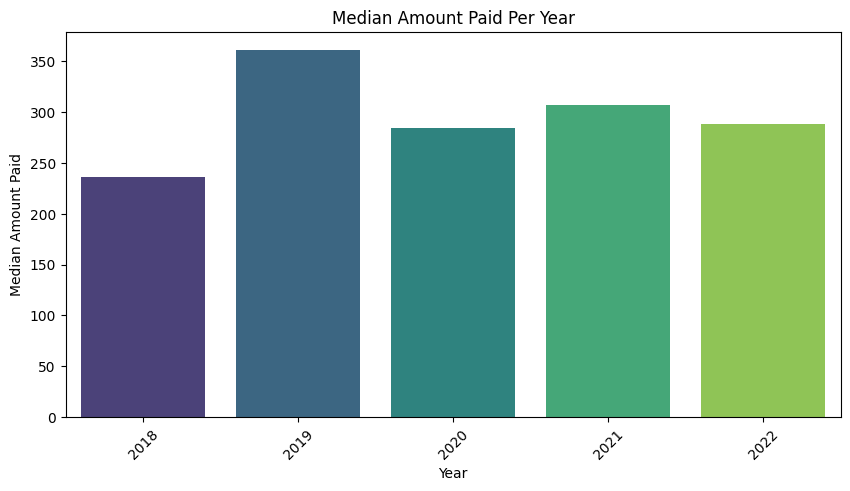

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_payments = pd.read_csv("payment_information.csv")

# Convert payment_date to datetime format
df_payments["payment_date"] = pd.to_datetime(df_payments["payment_date"])

# Extract year from the payment date
df_payments["year"] = df_payments["payment_date"].dt.year

# Calculate median amount paid per year
payment_year = df_payments.groupby("year")["amount_paid"].median().reset_index()

# Step 5: Print results
print(payment_year)

# Step 6: Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x="year", y="amount_paid", data=payment_year, palette="viridis")
plt.xlabel("Year")
plt.ylabel("Median Amount Paid")
plt.title("Median Amount Paid Per Year")
plt.xticks(rotation=45)
plt.show()
